In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
pd.set_option("display.max_columns", None)

In [2]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [3]:
# load data
df = pd.read_csv(r'C:\Users\Admin\Desktop\LoanDefault\Data\loan_data.csv\George_Files for Platform_Data Files\loan_data.csv')
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,587200,65607,78500,85.00,2,22998,86,1653,23-05-1993,Self employed,18-10-2018,4,2186,1,1,0,0,0,0,585,I-Medium Risk,13,4,1,3887803,7028184,7028184,1,1,0,108425,375000,237245,4839,0,1,1,2yrs 3mon,16yrs 10mon,0,0
1,479470,55259,63439,89.85,19,21435,86,1842,06-07-1984,Salaried,30-08-2018,4,596,1,1,0,0,0,0,741,C-Very Low Risk,5,3,0,1823431,1874823,1874823,0,0,0,0,0,0,0,0,0,0,1yrs 8mon,4yrs 5mon,0,0
2,448682,50503,66456,78.55,162,17094,86,1833,10-05-1997,Salaried,18-08-2018,4,3127,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,534325,63513,72500,88.69,2,22070,86,1655,01-08-1992,Salaried,25-09-2018,4,100,1,1,0,0,0,0,691,E-Low Risk,26,5,0,63507,85939,85939,0,0,0,0,0,0,0,0,7,0,0yrs 6mon,2yrs 0mon,0,0
4,469385,42794,60321,72.94,67,18129,45,1515,13-07-1991,Self employed,28-08-2018,6,394,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [4]:
df.tail()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
133149,601135,43929,74400,61.83,10,16291,49,5676,02-01-1990,Self employed,22-10-2018,3,2325,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
133150,616543,61283,74830,84.19,18,14878,45,2719,10-10-1989,Self employed,25-10-2018,4,451,1,1,0,0,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1yrs 5mon,1yrs 5mon,0,1
133151,440372,48349,68790,72.68,9,22888,49,5443,24-10-1960,Self employed,16-08-2018,3,1560,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
133152,523967,44143,56100,84.99,85,17138,45,1964,01-06-1980,Salaried,20-09-2018,4,717,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
133153,484491,57142,68395,84.99,2,15529,45,1724,01-06-1965,Salaried,31-08-2018,4,938,1,1,0,0,0,0,468,K-High Risk,1,1,1,204206,302000,302000,0,0,0,0,0,0,6491,0,0,1,1yrs 11mon,1yrs 11mon,0,1


---

# Exploratory Analysis

In [5]:
df.describe().round().T

# MobileNo_Avl_Flag has single value through out the column. It's meaningless for modeling. Needs to delete.

,count,mean,std,min,25%,50%,75%,max
UNIQUEID,133154.0,535936.0,68382.0,417428.0,476786.0,536026.0,595136.0,6.710330e+05
DISBURSED_AMOUNT,133154.0,54352.0,12616.0,13369.0,47145.0,53803.0,60447.0,3.320450e+05
ASSET_COST,133154.0,75853.0,18428.0,37000.0,65722.0,70965.0,79290.0,4.596250e+05
LTV,133154.0,75.0,11.0,10.0,69.0,77.0,84.0,9.500000e+01
BRANCH_ID,133154.0,73.0,70.0,1.0,14.0,61.0,130.0,2.610000e+02
SUPPLIER_ID,133154.0,19634.0,3491.0,10524.0,16528.0,20328.0,23000.0,2.480300e+04
MANUFACTURER_ID,133154.0,69.0,22.0,45.0,48.0,86.0,86.0,1.530000e+02
CURRENT_PINCODE_ID,133154.0,3395.0,2236.0,1.0,1512.0,2971.0,5669.0,7.345000e+03
STATE_ID,133154.0,7.0,4.0,1.0,4.0,6.0,10.0,2.200000e+01
EMPLOYEE_CODE_ID,133154.0,1550.0,974.0,1.0,713.0,1455.0,2364.0,3.795000e+03


In [6]:
df.info()

# DATE_OF_BIRTH and DISBURSAL_DATE need to be converted to date type
# BRANCH_ID, SUPPLIER_ID, MANUFACTURER_ID, STATE_ID need to be converted to object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133154 entries, 0 to 133153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             133154 non-null  int64  
 1   DISBURSED_AMOUNT                     133154 non-null  int64  
 2   ASSET_COST                           133154 non-null  int64  
 3   LTV                                  133154 non-null  float64
 4   BRANCH_ID                            133154 non-null  int64  
 5   SUPPLIER_ID                          133154 non-null  int64  
 6   MANUFACTURER_ID                      133154 non-null  int64  
 7   CURRENT_PINCODE_ID                   133154 non-null  int64  
 8   DATE_OF_BIRTH                        133154 non-null  object 
 9   EMPLOYMENT_TYPE                      128773 non-null  object 
 10  DISBURSAL_DATE                       133154 non-null  object 
 11  STATE_ID     

In [7]:
import pandas_profiling
report = pandas_profiling.ProfileReport(df)
report.to_file("df_data.html")

# 1. It's a fairly clean data. All variables are within reasonable range. No special value to impute. 
# 2. EMPLOYMENT_TYPE has 4381 missing records
# 3. DISBURSED_AMOUNT and ASSET_COST have some extreme values on the right side
# 4. SEC_NO_OF_ACCTS, SEC_ACTIVE_ACCTS, SEC_OVERDUE_ACCTS, SEC_CURRENT_BALANCE, SEC_SANCTIONED_AMOUNT, SEC_DISBURSED_AMOUNT, and
#    SEC_INSTAL_AMT have more than 95% zeros. 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# Fill blank EMPLOYMENT_TYPE as 'UNKNOWN'
df['EMPLOYMENT_TYPE'] = df['EMPLOYMENT_TYPE'].fillna('Unknown')
df['EMPLOYMENT_TYPE'].value_counts()

Self employed    72910
Salaried         55863
Unknown           4381
Name: EMPLOYMENT_TYPE, dtype: int64

In [9]:
# Drop 4 useless columns that are either ID or single-value. See below:
# UNIQUEID: Identifier for customers  -- all unique, meaningless
# CURRENT_PINCODE_ID: Current pincode of the customer  -- meaningless base on definition
# EMPLOYEE_CODE_ID: Employee of the organization who logged the disbursement  -- meaningless base on definition
# MOBILENO_AVL_FLAG: if Mobile no. was shared by the customer then flagged as 1  -- all single value, meaningless

df.drop(columns = ['UNIQUEID','CURRENT_PINCODE_ID','EMPLOYEE_CODE_ID','MOBILENO_AVL_FLAG'], inplace = True)
df.shape

(133154, 37)

In [10]:
# Convert DATE_OF_BIRTH and DISBURSAL_DATE to date type

df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'])
df['DISBURSAL_DATE'] = pd.to_datetime(df['DISBURSAL_DATE'])
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,65607,78500,85.00,2,22998,86,1993-05-23,Self employed,2018-10-18,4,1,0,0,0,0,585,I-Medium Risk,13,4,1,3887803,7028184,7028184,1,1,0,108425,375000,237245,4839,0,1,1,2yrs 3mon,16yrs 10mon,0,0
1,55259,63439,89.85,19,21435,86,1984-06-07,Salaried,2018-08-30,4,1,0,0,0,0,741,C-Very Low Risk,5,3,0,1823431,1874823,1874823,0,0,0,0,0,0,0,0,0,0,1yrs 8mon,4yrs 5mon,0,0
2,50503,66456,78.55,162,17094,86,1997-10-05,Salaried,2018-08-18,4,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,63513,72500,88.69,2,22070,86,1992-01-08,Salaried,2018-09-25,4,1,0,0,0,0,691,E-Low Risk,26,5,0,63507,85939,85939,0,0,0,0,0,0,0,0,7,0,0yrs 6mon,2yrs 0mon,0,0
4,42794,60321,72.94,67,18129,45,1991-07-13,Self employed,2018-08-28,6,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [11]:
# Create a new columns representing applicant's age by taking the date difference between disbursal date and birth date

df['Age'] = ((df['DISBURSAL_DATE'] - df['DATE_OF_BIRTH'])/ np.timedelta64(1, 'Y')).astype(int)
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,Age
0,65607,78500,85.00,2,22998,86,1993-05-23,Self employed,2018-10-18,4,1,0,0,0,0,585,I-Medium Risk,13,4,1,3887803,7028184,7028184,1,1,0,108425,375000,237245,4839,0,1,1,2yrs 3mon,16yrs 10mon,0,0,25
1,55259,63439,89.85,19,21435,86,1984-06-07,Salaried,2018-08-30,4,1,0,0,0,0,741,C-Very Low Risk,5,3,0,1823431,1874823,1874823,0,0,0,0,0,0,0,0,0,0,1yrs 8mon,4yrs 5mon,0,0,34
2,50503,66456,78.55,162,17094,86,1997-10-05,Salaried,2018-08-18,4,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,20
3,63513,72500,88.69,2,22070,86,1992-01-08,Salaried,2018-09-25,4,1,0,0,0,0,691,E-Low Risk,26,5,0,63507,85939,85939,0,0,0,0,0,0,0,0,7,0,0yrs 6mon,2yrs 0mon,0,0,26
4,42794,60321,72.94,67,18129,45,1991-07-13,Self employed,2018-08-28,6,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,27


In [12]:
# Drop DATE_OF_BIRTH and DISBURSAL_DATE since we already extracted age information from them and they have no other use. 

df.drop(columns = ['DISBURSAL_DATE','DATE_OF_BIRTH'], inplace = True)
df.shape

(133154, 36)

In [13]:
# Convert the following 4 columns from integer to object because we may be able to extract some insights from these sub-population
# BRANCH_ID: Branch where the loan was disbursed
# SUPPLIER_ID: Vehicle Dealer where the loan was disbursed
# MANUFACTURER_ID: Vehicle manufacturer(Hero, Honda, TVS etc.)
# STATE_ID: State of disbursement

id_lst = ['BRANCH_ID','SUPPLIER_ID','MANUFACTURER_ID','STATE_ID']

for col in id_lst:
    df[col] = df[col].apply(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133154 entries, 0 to 133153
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     133154 non-null  int64  
 1   ASSET_COST                           133154 non-null  int64  
 2   LTV                                  133154 non-null  float64
 3   BRANCH_ID                            133154 non-null  object 
 4   SUPPLIER_ID                          133154 non-null  object 
 5   MANUFACTURER_ID                      133154 non-null  object 
 6   EMPLOYMENT_TYPE                      133154 non-null  object 
 7   STATE_ID                             133154 non-null  object 
 8   AADHAR_FLAG                          133154 non-null  int64  
 9   PAN_FLAG                             133154 non-null  int64  
 10  VOTERID_FLAG                         133154 non-null  int64  
 11  DRIVING_FLAG 

In [14]:
# Split columns into categorical and numerical types

categorical_columns = list(df.select_dtypes(include = 'object').columns)
numerical_columns = list(df.select_dtypes(exclude='object').columns)
numerical_columns.remove('LOAN_DEFAULT')

print(categorical_columns)
print(numerical_columns)
print(len(categorical_columns))
print(len(numerical_columns))

['BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'EMPLOYMENT_TYPE', 'STATE_ID', 'PERFORM_CNS_SCORE_DESCRIPTION', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH']
['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES', 'Age']
8
27


In [15]:
# Calculate the default rate for the whole population

global_default_rate = df.LOAN_DEFAULT.mean()
print(global_default_rate)

0.2879748261411599


In [16]:
# Calculate Risk Ratio for categorical variables

for col in categorical_columns:
    df_group = df.groupby(by=col).LOAN_DEFAULT.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_default_rate
    df_group['rate'] = df_group['mean'] / global_default_rate
    display(df_group)

# Thoughts: 
# 1. Risk Ratio of BRANCH_ID, SUPPLIER_ID, MANUFACTURER_ID, are STATE_ID are not helpful. Some subgroups have very small sample 
#    size, so their risk ratio might have extreme value which cannot represent the true information. We are also lack of 
#    information for each ID code, so we cannot manually group the small subgroups geographically or in other meaningful way
#    to give a more meaningful estimate. 
# 2. PERFORM_CNS_SCORE_DESCRIPTION, AVERAGE_ACCT_AGE, and CREDIT_HISTORY_LENGTH are ordinal variables
# 3. EMPLOYMENT_TYPE and PERFORM_CNS_SCORE_DESCRIPTION have strong relationship to the target variable and the risk ratio 
#    among groups is explanable. The risk ratio of PERFORM_CNS_SCORE_DESCRIPTION has some fluctuation from low risk to high 
#    risk, but the overall trend looks okay. 
# 4. AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH have too many subgroups. We can try to re-group them into less bins

,mean,count,diff,rate
BRANCH_ID,,,,
1,0.310127,3318,0.022152,1.076923
10,0.445506,2303,0.157531,1.547031
100,0.280788,203,-0.007187,0.975044
101,0.290816,196,0.002842,1.009867
103,0.295037,2176,0.007062,1.024523
...,...,...,...,...
82,0.213703,613,-0.074272,0.742090
84,0.204301,93,-0.083674,0.709441
85,0.299083,1090,0.011108,1.038572


,mean,count,diff,rate
SUPPLIER_ID,,,,
10524,0.500000,2,0.212025,1.736263
12311,0.500000,2,0.212025,1.736263
12312,0.153846,26,-0.134129,0.534235
12374,0.228070,57,-0.059905,0.791980
12441,0.312500,32,0.024525,1.085164
...,...,...,...,...
24794,0.000000,1,-0.287975,0.000000
24797,0.500000,2,0.212025,1.736263
24799,0.000000,1,-0.287975,0.000000


,mean,count,diff,rate
MANUFACTURER_ID,,,,
120,0.282210,5503,-0.005765,0.979980
145,0.240535,449,-0.047440,0.835262
152,0.000000,1,-0.287975,0.000000
153,0.625000,8,0.337025,2.170329
45,0.300124,32280,0.012149,1.042188
48,0.329675,9385,0.041700,1.144805
49,0.315870,5860,0.027895,1.096868
51,0.290440,15721,0.002465,1.008559
67,0.346608,1356,0.058633,1.203604


,mean,count,diff,rate
EMPLOYMENT_TYPE,,,,
Salaried,0.161359,55863,-0.126616,0.560323
Self employed,0.387944,72910,0.099969,1.347146
Unknown,0.238758,4381,-0.049217,0.829094


,mean,count,diff,rate
STATE_ID,,,,
1,0.239148,5068,-0.048827,0.830446
10,0.224795,2073,-0.063180,0.780606
11,0.259585,3860,-0.028389,0.901417
12,0.374895,2390,0.086921,1.301834
13,0.391502,10143,0.103527,1.359499
14,0.304548,5431,0.016573,1.057551
15,0.277928,2954,-0.010047,0.965113
16,0.251481,1519,-0.036494,0.873275
17,0.279772,2284,-0.008202,0.971517


,mean,count,diff,rate
PERFORM_CNS_SCORE_DESCRIPTION,,,,
A-Very Low Risk,0.098611,8062,-0.189364,0.342428
B-Very Low Risk,0.080734,5289,-0.207241,0.280349
C-Very Low Risk,0.106442,9066,-0.181533,0.369621
D-Very Low Risk,0.091823,6469,-0.196152,0.318856
E-Low Risk,0.101232,3329,-0.186743,0.351529
F-Low Risk,0.114620,4877,-0.173355,0.398020
G-Low Risk,0.114159,2260,-0.173816,0.396421
H-Medium Risk,0.152224,3935,-0.135751,0.528600
I-Medium Risk,0.173385,3126,-0.114590,0.602082


,mean,count,diff,rate
AVERAGE_ACCT_AGE,,,,
0yrs 0mon,0.371544,68296,0.083570,1.290198
0yrs 10mon,0.176044,2897,-0.111931,0.611318
0yrs 11mon,0.175671,3017,-0.112304,0.610023
0yrs 1mon,0.325216,1273,0.037241,1.129321
0yrs 2mon,0.297427,1671,0.009452,1.032822
...,...,...,...,...
9yrs 5mon,0.600000,10,0.312025,2.083515
9yrs 6mon,0.400000,5,0.112025,1.389010
9yrs 7mon,0.363636,11,0.075662,1.262737


,mean,count,diff,rate
CREDIT_HISTORY_LENGTH,,,,
0yrs 0mon,0.371431,68158,0.083456,1.289804
0yrs 10mon,0.156509,1329,-0.131466,0.543480
0yrs 11mon,0.170418,1555,-0.117557,0.591781
0yrs 1mon,0.353933,1068,0.065958,1.229040
0yrs 2mon,0.377758,1133,0.089783,1.311775
...,...,...,...,...
9yrs 5mon,0.212766,47,-0.075209,0.738835
9yrs 6mon,0.250000,44,-0.037975,0.868131
9yrs 7mon,0.265306,49,-0.022669,0.921282


In [17]:
# Regroup AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH by year

df['AVERAGE_ACCT_AGE_Bin'] = df['AVERAGE_ACCT_AGE'].str[:4]
df['CREDIT_HISTORY_LENGTH_Bin'] = df['CREDIT_HISTORY_LENGTH'].str[:4]
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,Age,AVERAGE_ACCT_AGE_Bin,CREDIT_HISTORY_LENGTH_Bin
0,65607,78500,85.00,2,22998,86,Self employed,4,1,0,0,0,0,585,I-Medium Risk,13,4,1,3887803,7028184,7028184,1,1,0,108425,375000,237245,4839,0,1,1,2yrs 3mon,16yrs 10mon,0,0,25,2yrs,16yr
1,55259,63439,89.85,19,21435,86,Salaried,4,1,0,0,0,0,741,C-Very Low Risk,5,3,0,1823431,1874823,1874823,0,0,0,0,0,0,0,0,0,0,1yrs 8mon,4yrs 5mon,0,0,34,1yrs,4yrs
2,50503,66456,78.55,162,17094,86,Salaried,4,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,20,0yrs,0yrs
3,63513,72500,88.69,2,22070,86,Salaried,4,1,0,0,0,0,691,E-Low Risk,26,5,0,63507,85939,85939,0,0,0,0,0,0,0,0,7,0,0yrs 6mon,2yrs 0mon,0,0,26,0yrs,2yrs
4,42794,60321,72.94,67,18129,45,Self employed,6,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,27,0yrs,0yrs


In [18]:
# Calculate the count in each subgroup of AVERAGE_ACCT_AGE_Bin

df['AVERAGE_ACCT_AGE_Bin'].value_counts()

# It looks better to group 5yrs and above together to have a decent sample size. 

0yrs    96164
1yrs    20928
2yrs     8505
3yrs     3760
4yrs     1736
5yrs      909
6yrs      460
7yrs      275
8yrs      137
9yrs       81
10yr       67
11yr       60
12yr       38
13yr       15
15yr        5
14yr        5
16yr        4
17yr        2
30yr        1
18yr        1
24yr        1
Name: AVERAGE_ACCT_AGE_Bin, dtype: int64

In [19]:
# For AVERAGE_ACCT_AGE_Bin, group 5yrs and above together

AVERAGE_ACCT_AGE_Dict = {
'0yrs':'0yrs',
'1yrs':'1yrs',
'2yrs':'2yrs',
'3yrs':'3yrs',
'4yrs':'4yrs',
'5yrs':'5yrs_and_above',
'6yrs':'5yrs_and_above',
'7yrs':'5yrs_and_above',
'8yrs':'5yrs_and_above',
'9yrs':'5yrs_and_above',
'10yr':'5yrs_and_above',
'11yr':'5yrs_and_above',
'12yr':'5yrs_and_above',
'13yr':'5yrs_and_above',
'14yr':'5yrs_and_above',
'15yr':'5yrs_and_above',
'16yr':'5yrs_and_above',
'17yr':'5yrs_and_above',
'30yr':'5yrs_and_above',
'24yr':'5yrs_and_above',
'18yr':'5yrs_and_above',
}

df['AVERAGE_ACCT_AGE_Bin'] = df['AVERAGE_ACCT_AGE_Bin'].map(AVERAGE_ACCT_AGE_Dict)

df['AVERAGE_ACCT_AGE_Bin'].value_counts()

0yrs              96164
1yrs              20928
2yrs               8505
3yrs               3760
5yrs_and_above     2061
4yrs               1736
Name: AVERAGE_ACCT_AGE_Bin, dtype: int64

In [20]:
# Calculate the count in each subgroup of CREDIT_HISTORY_LENGTH_Bin

df['CREDIT_HISTORY_LENGTH_Bin'].value_counts()

# It looks better to group 8yrs and above together to have a decent sample size. 

0yrs    84429
1yrs    15259
2yrs    12828
3yrs     6759
4yrs     4307
5yrs     2902
6yrs     1656
7yrs     1095
8yrs      790
11yr      680
10yr      673
9yrs      618
12yr      431
13yr      278
14yr      178
15yr       95
16yr       48
17yr       41
18yr       16
19yr       15
20yr       15
22yr       12
21yr        7
23yr        5
24yr        4
25yr        3
29yr        2
26yr        2
27yr        2
37yr        1
30yr        1
28yr        1
35yr        1
Name: CREDIT_HISTORY_LENGTH_Bin, dtype: int64

In [21]:
# For CREDIT_HISTORY_LENGTH_Bin, group 8yrs and above together

CREDIT_HISTORY_LENGTH_Bin_Dict = {
'0yrs':'0yrs',
'1yrs':'1yrs',
'2yrs':'2yrs',
'3yrs':'3yrs',
'4yrs':'4yrs',
'5yrs':'5yrs',
'6yrs':'6yrs',
'7yrs':'7yrs',
'8yrs':'8yrs_and_above',
'11yr':'8yrs_and_above',
'10yr':'8yrs_and_above',
'9yrs':'8yrs_and_above',
'12yr':'8yrs_and_above',
'13yr':'8yrs_and_above',
'14yr':'8yrs_and_above',
'15yr':'8yrs_and_above',
'16yr':'8yrs_and_above',
'17yr':'8yrs_and_above',
'18yr':'8yrs_and_above',
'19yr':'8yrs_and_above',
'20yr':'8yrs_and_above',
'22yr':'8yrs_and_above',
'21yr':'8yrs_and_above',
'23yr':'8yrs_and_above',
'24yr':'8yrs_and_above',
'25yr':'8yrs_and_above',
'26yr':'8yrs_and_above',
'29yr':'8yrs_and_above',
'27yr':'8yrs_and_above',
'28yr':'8yrs_and_above',
'35yr':'8yrs_and_above',
'37yr':'8yrs_and_above',
'30yr':'8yrs_and_above',
}

df['CREDIT_HISTORY_LENGTH_Bin'] = df['CREDIT_HISTORY_LENGTH_Bin'].map(CREDIT_HISTORY_LENGTH_Bin_Dict)

df['CREDIT_HISTORY_LENGTH_Bin'].value_counts()

0yrs              84429
1yrs              15259
2yrs              12828
3yrs               6759
4yrs               4307
8yrs_and_above     3919
5yrs               2902
6yrs               1656
7yrs               1095
Name: CREDIT_HISTORY_LENGTH_Bin, dtype: int64

In [22]:
# Calculate the risk ratio AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH with the new bin

for col in ['AVERAGE_ACCT_AGE_Bin', 'CREDIT_HISTORY_LENGTH_Bin']:
    df_group = df.groupby(by=col).LOAN_DEFAULT.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_default_rate
    df_group['rate'] = df_group['mean'] / global_default_rate
    display(df_group)
    
# Thoughts:
# AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH have some relationship with target variable. It makes sense that 0yrs has higher 
# risk ratio than bins greater than 0yrs. But for groups higher than 0yrs, the risk ratio is showing that the longer the 
# average loan tenure or time since first loan, the higher risk it is. That's not monotonic. 
# For AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH, it might be better to group 1yrs and above as one group and 0yrs as the other
# group. 

,mean,count,diff,rate
AVERAGE_ACCT_AGE_Bin,,,,
0yrs,0.313683,96164,0.025708,1.089272
1yrs,0.204941,20928,-0.083034,0.711662
2yrs,0.227160,8505,-0.060814,0.788821
3yrs,0.247872,3760,-0.040102,0.860743
4yrs,0.252304,1736,-0.035671,0.876133
5yrs_and_above,0.285784,2061,-0.002191,0.992391


,mean,count,diff,rate
CREDIT_HISTORY_LENGTH_Bin,,,,
0yrs,0.334861,84429,0.046886,1.162814
1yrs,0.173471,15259,-0.114503,0.602384
2yrs,0.214375,12828,-0.073600,0.744422
3yrs,0.215712,6759,-0.072262,0.749067
4yrs,0.218482,4307,-0.069493,0.758683
5yrs,0.225017,2902,-0.062958,0.781378
6yrs,0.237923,1656,-0.050052,0.826193
7yrs,0.243836,1095,-0.044139,0.846725
8yrs_and_above,0.245726,3919,-0.042249,0.853290


In [23]:
# For AVERAGE_ACCT_AGE_Bin, group 1yrs and above together

AVERAGE_ACCT_AGE_Dict = {
'0yrs':'0yrs',
'1yrs':'1yrs_and_above',
'2yrs':'1yrs_and_above',
'3yrs':'1yrs_and_above',
'4yrs':'1yrs_and_above',
'5yrs_and_above':'1yrs_and_above'
}

df['AVERAGE_ACCT_AGE_Bin'] = df['AVERAGE_ACCT_AGE_Bin'].map(AVERAGE_ACCT_AGE_Dict)

df['AVERAGE_ACCT_AGE_Bin'].value_counts()

0yrs              96164
1yrs_and_above    36990
Name: AVERAGE_ACCT_AGE_Bin, dtype: int64

In [24]:
# For CREDIT_HISTORY_LENGTH_Bin, group 1yrs and above together

CREDIT_HISTORY_LENGTH_Bin_Dict = {
'0yrs':'0yrs',
'1yrs':'1yrs_and_above',
'2yrs':'1yrs_and_above',
'3yrs':'1yrs_and_above',
'4yrs':'1yrs_and_above',
'5yrs':'1yrs_and_above',
'6yrs':'1yrs_and_above',
'7yrs':'1yrs_and_above',
'8yrs_and_above':'1yrs_and_above',
}

df['CREDIT_HISTORY_LENGTH_Bin'] = df['CREDIT_HISTORY_LENGTH_Bin'].map(CREDIT_HISTORY_LENGTH_Bin_Dict)

df['CREDIT_HISTORY_LENGTH_Bin'].value_counts()

0yrs              84429
1yrs_and_above    48725
Name: CREDIT_HISTORY_LENGTH_Bin, dtype: int64

In [25]:
# Calculate the risk ratio AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH with the new bin

for col in ['AVERAGE_ACCT_AGE_Bin', 'CREDIT_HISTORY_LENGTH_Bin']:
    df_group = df.groupby(by=col).LOAN_DEFAULT.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_default_rate
    df_group['rate'] = df_group['mean'] / global_default_rate
    display(df_group)

# Based on risk ratio, EMPLOYMENT_TYPE, PERFORM_CNS_SCORE_DESCRIPTION, AVERAGE_ACCT_AGE (binned), and CREDIT_HISTORY_LENGTH 
# (binned) have decent relationship with target variable

,mean,count,diff,rate
AVERAGE_ACCT_AGE_Bin,,,,
0yrs,0.313683,96164,0.025708,1.089272
1yrs_and_above,0.221141,36990,-0.066834,0.767917


,mean,count,diff,rate
CREDIT_HISTORY_LENGTH_Bin,,,,
0yrs,0.334861,84429,0.046886,1.162814
1yrs_and_above,0.206732,48725,-0.081243,0.717881


In [26]:
# Add AVERAGE_ACCT_AGE_Bin and CREDIT_HISTORY_LENGTH_Bin into categorical_columns list
categorical_columns.extend(['AVERAGE_ACCT_AGE_Bin', 'CREDIT_HISTORY_LENGTH_Bin'])

In [27]:
# Calculate Mutual Information value for all categorical variables

from sklearn.metrics import mutual_info_score
 
def calculate_mi(series):
    return mutual_info_score(series, df.LOAN_DEFAULT)
 
df_mi = df[categorical_columns].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

# Based on mutual information value, EMPLOYMENT_TYPE, PERFORM_CNS_SCORE_DESCRIPTION, AVERAGE_ACCT_AGE, and CREDIT_HISTORY_LENGTH
# have decent strength. 
# SUPPLIER_ID has decent mutual information value, but that may because of the super small sample in some groups that we found 
# earlier. 
# AVERAGE_ACCT_AGE_Bin and CREDIT_HISTORY_LENGTH_Bin doesn't have significant relationship to target variable. 

,MI
PERFORM_CNS_SCORE_DESCRIPTION,0.052149
EMPLOYMENT_TYPE,0.031172
SUPPLIER_ID,0.027271
CREDIT_HISTORY_LENGTH,0.021991
AVERAGE_ACCT_AGE,0.021929
CREDIT_HISTORY_LENGTH_Bin,0.009590
BRANCH_ID,0.008663
STATE_ID,0.005128
AVERAGE_ACCT_AGE_Bin,0.004333
MANUFACTURER_ID,0.000888


In [28]:
# Calculate correlation coefficient for all numerical variables

df[numerical_columns].corrwith(df.LOAN_DEFAULT).sort_values(ascending=False)

# PERFORM_CNS_SCORE and PRI_ACTIVE_ACCTS are the strongest two variables based on correlation coefficient to target variable

PRI_OVERDUE_ACCTS                      0.085734
DISBURSED_AMOUNT                       0.082687
LTV                                    0.075647
VOTERID_FLAG                           0.052963
ASSET_COST                             0.035267
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS    0.020883
NO_OF_INQUIRIES                       -0.000180
PAN_FLAG                              -0.001653
PASSPORT_FLAG                         -0.001939
DRIVING_FLAG                          -0.003697
SEC_INSTAL_AMT                        -0.004786
SEC_CURRENT_BALANCE                   -0.005351
SEC_DISBURSED_AMOUNT                  -0.005625
SEC_SANCTIONED_AMOUNT                 -0.005735
SEC_OVERDUE_ACCTS                     -0.005873
SEC_ACTIVE_ACCTS                      -0.009260
SEC_NO_OF_ACCTS                       -0.009715
Age                                   -0.011583
PRIMARY_INSTAL_AMT                    -0.012018
PRI_DISBURSED_AMOUNT                  -0.013943
PRI_SANCTIONED_AMOUNT                 -0

In [29]:
# Check the relationship between PERFORM_CNS_SCORE and PERFORM_CNS_SCORE_DESCRIPTION
df.groupby(by='PERFORM_CNS_SCORE_DESCRIPTION').PERFORM_CNS_SCORE.agg(['count','mean'])

# The valid range of PERFORM_CNS_SCORE is 300 and 890
# PERFORM_CNS_SCORE = 0 means No Bureau History Available
# PERFORM_CNS_SCORE between 14 and 18 means Not Scored due to various reasons

,count,mean
PERFORM_CNS_SCORE_DESCRIPTION,,
A-Very Low Risk,8062,827.650583
B-Very Low Risk,5289,774.232558
C-Very Low Risk,9066,741.996691
D-Very Low Risk,6469,715.946360
E-Low Risk,3329,691.441274
F-Low Risk,4877,666.082428
G-Low Risk,2260,640.948230
H-Medium Risk,3935,617.172808
I-Medium Risk,3126,586.774152


In [30]:
# Calculate correlation coefficient
df[numerical_columns].corr()

# ASSET_COST and DISBURSED_AMOUNT are highly correlated
# VOTERID_FLAG and AADHAR_FLAG are highly correlated
# PRI_ACTIVE_ACCTS and PRI_NO_OF_ACCTS are highly correlated
# NEW_ACCTS_IN_LAST_SIX_MONTHS and PRI_ACTIVE_ACCTS are highly correlated
# PRI_DISBURSED_AMOUNT and PRI_SANCTIONED_AMOUNT are highly correlated
# SEC_ACTIVE_ACCTS and SEC_NO_OF_ACCTS are highly correlated
# SEC_SANCTIONED_AMOUNT and SEC_CURRENT_BALANCE are highly correlated
# SEC_DISBURSED_AMOUNT and SEC_CURRENT_BALANCE are highly correlated
# SEC_DISBURSED_AMOUNT and SEC_SANCTIONED_AMOUNT are highly correlated

,DISBURSED_AMOUNT,ASSET_COST,LTV,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,Age
DISBURSED_AMOUNT,1.000000,0.738439,0.388480,-0.018288,0.012237,0.013213,0.000832,0.010335,0.009327,0.034649,0.039761,0.020196,0.017902,0.005329,0.005471,-0.015899,-0.015721,-0.008804,-0.004040,-0.005711,-0.005639,0.001243,-0.006924,0.035043,0.019619,0.038820,-0.061408
ASSET_COST,0.738439,1.000000,-0.309074,-0.096544,0.048031,0.086399,0.019995,0.005587,-0.050700,-0.027164,-0.023554,-0.013488,-0.003244,0.000232,0.000214,-0.022230,-0.021730,-0.014789,-0.009012,-0.011652,-0.011523,-0.004491,-0.005398,-0.021803,-0.007370,-0.019480,-0.122455
LTV,0.388480,-0.309074,1.000000,0.104995,-0.039455,-0.097879,-0.023431,0.006537,0.084029,0.085303,0.088612,0.049526,0.028063,0.006935,0.007131,0.011300,0.010877,0.010678,0.007893,0.009420,0.009315,0.005336,-0.001590,0.080516,0.039062,0.087298,0.081608
AADHAR_FLAG,-0.018288,-0.096544,0.104995,1.000000,-0.199538,-0.870269,-0.283849,-0.083430,0.067185,0.051857,0.062379,0.022303,0.027121,0.011705,0.011681,0.016264,0.012875,0.010467,0.006102,0.007091,0.006979,0.012179,0.007515,0.057984,0.021268,0.026474,0.018376
PAN_FLAG,0.012237,0.048031,-0.039455,-0.199538,1.000000,0.174605,-0.009264,0.001974,0.012637,-0.008547,0.004692,-0.009532,-0.000985,-0.001572,-0.001213,0.028453,0.033284,0.022510,0.012624,0.018052,0.017609,-0.010207,0.000858,0.006683,-0.000651,0.017115,-0.015157
VOTERID_FLAG,0.013213,0.086399,-0.097879,-0.870269,0.174605,1.000000,-0.048261,-0.016091,-0.069026,-0.054973,-0.067609,-0.027035,-0.033445,-0.013678,-0.013678,-0.016339,-0.012589,-0.006929,-0.005557,-0.006565,-0.006481,-0.018152,-0.007332,-0.057878,-0.027372,-0.017302,-0.014260
DRIVING_FLAG,0.000832,0.019995,-0.023431,-0.283849,-0.009264,-0.048261,1.000000,-0.004949,0.005335,0.009930,0.009937,0.013575,0.007001,0.002475,0.002477,0.007104,0.007485,0.002885,0.004308,0.006090,0.006082,0.008853,-0.000773,-0.000365,0.014814,-0.023032,-0.008927
PASSPORT_FLAG,0.010335,0.005587,0.006537,-0.083430,0.001974,-0.016091,-0.004949,1.000000,0.011419,0.014910,0.021123,0.018501,0.015906,0.006099,0.005976,0.004066,-0.000386,0.001481,-0.001005,-0.001215,-0.001191,0.021064,-0.000201,0.007367,0.011901,-0.001294,-0.005024
PERFORM_CNS_SCORE,0.009327,-0.050700,0.084029,0.067185,0.012637,-0.069026,0.005335,0.011419,1.000000,0.432130,0.479666,0.107861,0.155497,0.065896,0.065344,0.054293,0.046345,0.034945,0.017307,0.021341,0.020980,0.065557,0.016358,0.346006,0.164339,0.150285,0.169171
PRI_NO_OF_ACCTS,0.034649,-0.027164,0.085303,0.051857,-0.008547,-0.054973,0.009930,0.014910,0.432130,1.000000,0.764587,0.361693,0.310278,0.124013,0.123723,0.053168,0.042328,0.028933,0.020583,0.024812,0.024447,0.259805,0.021016,0.543773,0.314821,0.185573,0.171768


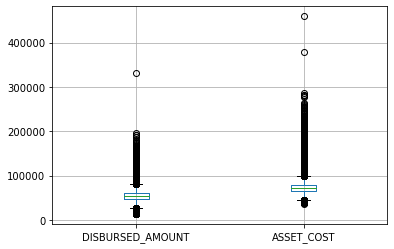

In [36]:
# Create boxplot for all numerical variables

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

boxplot = df.boxplot(column=['DISBURSED_AMOUNT', 'ASSET_COST'])
plt.show()

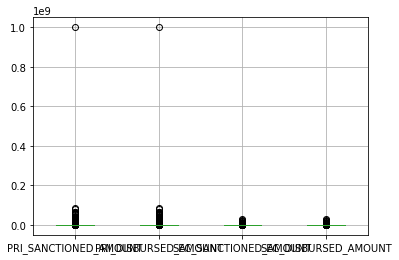

In [43]:
boxplot = df.boxplot(column=['PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT','SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT'])
plt.show()

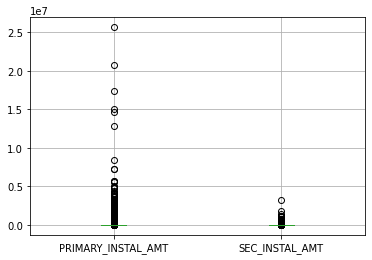

In [44]:
boxplot = df.boxplot(column=['PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT'])
plt.show()

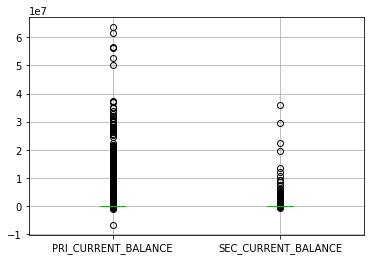

In [45]:
boxplot = df.boxplot(column=['PRI_CURRENT_BALANCE','SEC_CURRENT_BALANCE'])
plt.show()

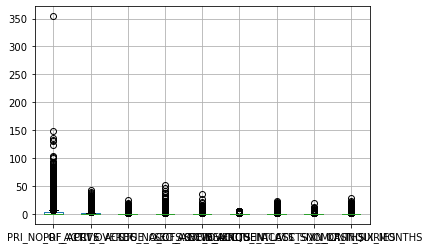

In [48]:
boxplot = df.boxplot(column=['PRI_NO_OF_ACCTS','PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',  'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
                             'SEC_OVERDUE_ACCTS', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
                             'NO_OF_INQUIRIES'])
plt.show()

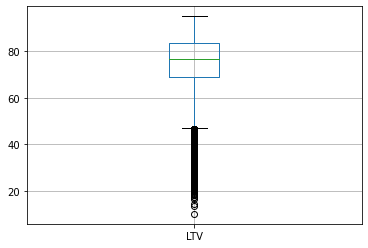

In [49]:
boxplot = df.boxplot(column=['LTV'])
plt.show()

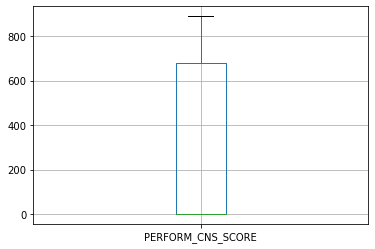

In [50]:
boxplot = df.boxplot(column=['PERFORM_CNS_SCORE'])
plt.show()

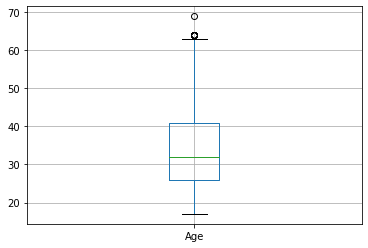

In [51]:
boxplot = df.boxplot(column=['Age'])
plt.show()

In [58]:
# Calculate the flag rate

flag_lst = ['AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG']

for col in flag_lst:
    print(col + ": " + str(round(df[col].mean(),3)))

AADHAR_FLAG: 0.84
PAN_FLAG: 0.075
VOTERID_FLAG: 0.145
DRIVING_FLAG: 0.024
PASSPORT_FLAG: 0.002
